# Dependencies

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import PIL
from PIL import Image
from skimage.measure import compare_psnr

import tensorflow
import keras
from keras import optimizers
from keras.backend import tf as ktf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, BatchNormalization, LeakyReLU, Lambda, Concatenate

from common_utils import *
from SkipNet import *

# Read Image

In [9]:
imsize = 512
sigma = 25
sigma_ = sigma/255.

## denoising
# fname = 'data/denoising/snail.jpg'
fname = 'data/denoising/F16_GT.png'

In [10]:
## Load Image
if fname == 'data/denoising/snail.jpg':
    img_noisy_pil = crop_image(get_image(fname, imsize)[0], d=32)
    img_noisy_np = pil_to_np(img_noisy_pil)
    
    # As we don't have ground truth
    img_pil = img_noisy_pil
    img_np = img_noisy_np
    
elif fname == 'data/denoising/F16_GT.png':
    # Add synthetic noise
    img_pil = crop_image(get_image(fname, imsize)[0], d=32)
    img_np = pil_to_np(img_pil)
    
    img_noisy_pil, img_noisy_np = get_noisy_image(img_np, sigma_)

else:
    assert False

In [11]:
img_noisy_np.shape

(3, 512, 512)

# Setup

In [12]:
## Set up 
INPUT = 'noise' # 'meshgrid'

reg_noise_std = 1./30. # set to 1./20. for sigma=50
LR = 0.01

#set hyper-parameters for net
num_iter = 3000
input_depth = 32 

# Build

In [13]:
#get noise input
net_input = get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0]))
#net_input shape is [1, 512, 512, 32]

In [14]:
net_input.shape

(1, 512, 512, 32)

In [15]:
net_input = net_input.reshape((1, imsize, imsize, 32))

In [16]:
input_shape = net_input.shape[1:]

In [17]:
img_noisy_np = img_noisy_np.reshape((1, imsize, imsize, 3))

In [18]:
img_np = img_np.reshape((1, imsize, imsize, 3))

In [19]:
m = build_skip_net(4, 4, input_shape)

W0804 18:04:23.502534 4453070272 deprecation_wrapper.py:119] From /Users/lucasmeng/anaconda3/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 18:04:23.528789 4453070272 deprecation_wrapper.py:119] From /Users/lucasmeng/anaconda3/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 18:04:23.534861 4453070272 deprecation_wrapper.py:119] From /Users/lucasmeng/anaconda3/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 18:04:23.610323 4453070272 deprecation_wrapper.py:119] From /Users/lucasmeng/anaconda3/envs/py36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Pl

Shape after downsample: (?, 32, 32, 128)


W0804 18:04:28.386329 4453070272 deprecation_wrapper.py:119] From /Users/lucasmeng/DeepImagePrior/SkipNet.py:36: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.



Shape after upsample: (?, 512, 512, 32)
Output shape: (?, 512, 512, 3)


In [20]:
adam = optimizers.Adam(lr=LR, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

m.compile(loss='mean_squared_error',
              optimizer=adam,
              metrics=['mse'])

m.summary()

W0804 18:04:31.169037 4453070272 deprecation_wrapper.py:119] From /Users/lucasmeng/anaconda3/envs/py36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 32) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 4624        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256, 256, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

# Train

Iter # 0 , PSRN NOISY:  16.346391141115426 ; PSRN GT:  18.493602950078746


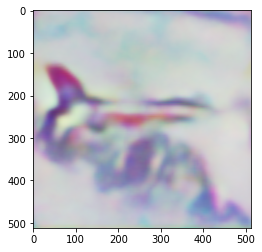

Iter # 1 , PSRN NOISY:  15.175289668733551 ; PSRN GT:  16.670062141021667


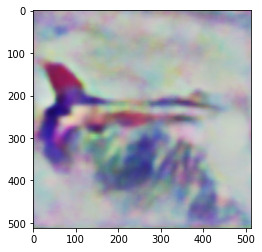

Iter # 2 , PSRN NOISY:  14.316472280559411 ; PSRN GT:  15.489865327929298


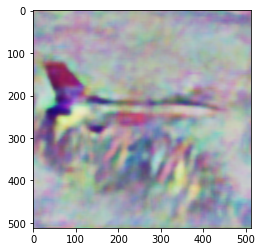

Iter # 3 , PSRN NOISY:  17.160742172574935 ; PSRN GT:  19.842163272552664


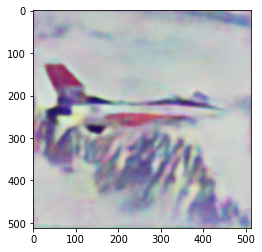

Iter # 4 , PSRN NOISY:  17.96416619615808 ; PSRN GT:  21.465982277815954


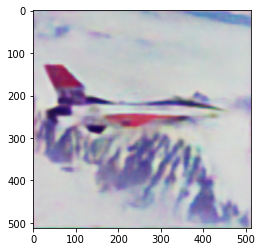

Iter # 5 , PSRN NOISY:  18.029128352294656 ; PSRN GT:  21.598590884813827


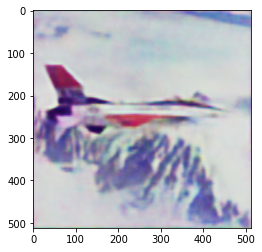

Iter # 6 , PSRN NOISY:  18.37892741574953 ; PSRN GT:  22.36651956645344


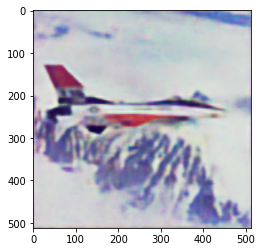

Iter # 7 , PSRN NOISY:  18.378003308253884 ; PSRN GT:  22.32821990601467


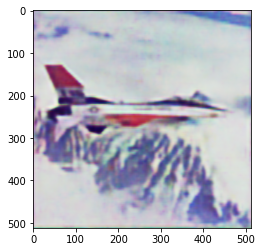

Iter # 8 , PSRN NOISY:  18.540123252033677 ; PSRN GT:  22.71372986440757


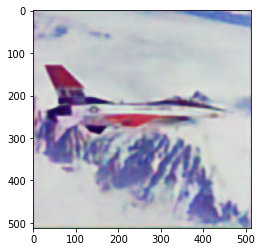

Iter # 9 , PSRN NOISY:  18.60768517681509 ; PSRN GT:  22.785973152935853


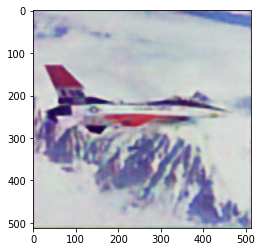

Iter # 10 , PSRN NOISY:  18.743726839208275 ; PSRN GT:  23.102953515816242


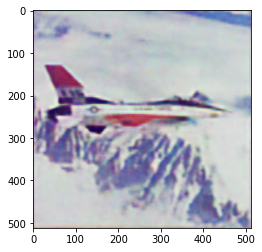

Iter # 11 , PSRN NOISY:  18.832809736887842 ; PSRN GT:  23.29332825151869


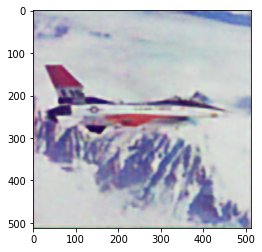

Iter # 12 , PSRN NOISY:  18.843231421143724 ; PSRN GT:  23.235114250872403


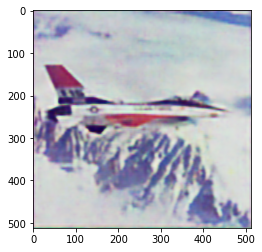

Iter # 13 , PSRN NOISY:  18.892058655735738 ; PSRN GT:  23.281419275921888


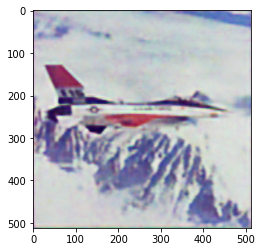

Iter # 14 , PSRN NOISY:  18.961364668493804 ; PSRN GT:  23.384063170376294


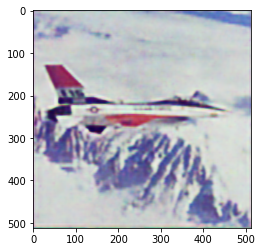

Iter # 15 , PSRN NOISY:  19.092665031184165 ; PSRN GT:  23.687701771839595


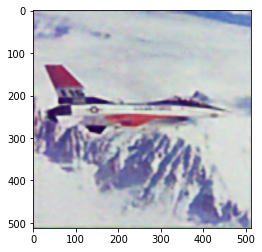

Iter # 16 , PSRN NOISY:  19.096758126593027 ; PSRN GT:  23.580401453982955


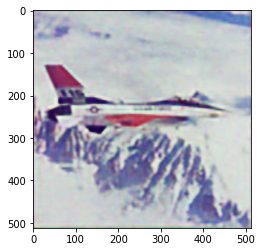

Iter # 17 , PSRN NOISY:  19.093045018701314 ; PSRN GT:  23.4621036316153


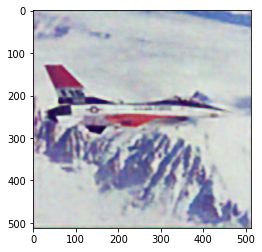

Iter # 18 , PSRN NOISY:  19.130438513699033 ; PSRN GT:  23.552758058575733


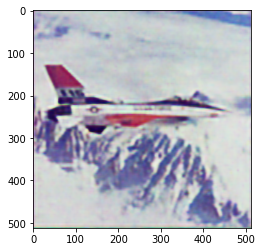

Iter # 19 , PSRN NOISY:  19.191473606726955 ; PSRN GT:  23.654834922485556


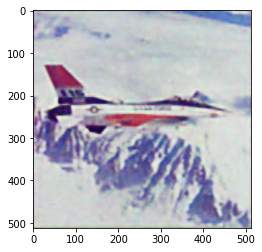

Iter # 20 , PSRN NOISY:  19.21965613996964 ; PSRN GT:  23.642623718402152


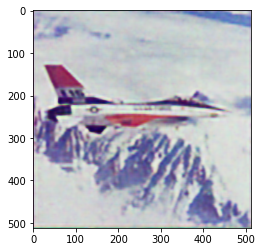

Iter # 21 , PSRN NOISY:  19.21757295516387 ; PSRN GT:  23.477227337664225


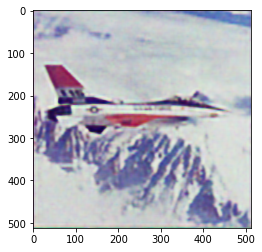

Iter # 22 , PSRN NOISY:  19.21751680557119 ; PSRN GT:  23.401537414606835


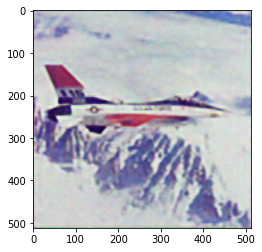

Iter # 23 , PSRN NOISY:  19.196845059419495 ; PSRN GT:  23.305585003663648


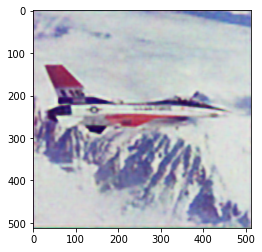

Iter # 24 , PSRN NOISY:  19.241530894570648 ; PSRN GT:  23.280667484561363


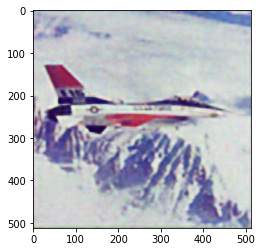

Iter # 25 , PSRN NOISY:  19.172301800360724 ; PSRN GT:  23.017740100628863


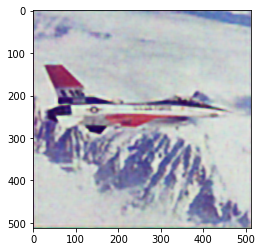

Iter # 26 , PSRN NOISY:  19.233857048803227 ; PSRN GT:  23.140600224782638


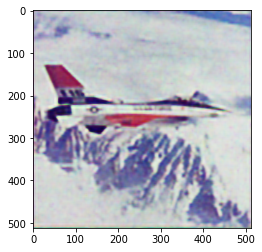

Iter # 27 , PSRN NOISY:  19.314161807821918 ; PSRN GT:  23.200080833545034


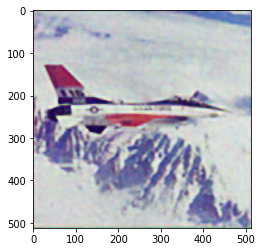

Iter # 28 , PSRN NOISY:  19.28369696530261 ; PSRN GT:  23.092088335100872


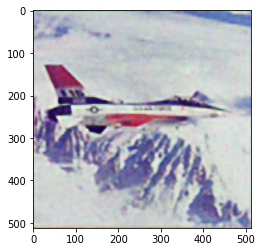

Iter # 29 , PSRN NOISY:  19.350148415210434 ; PSRN GT:  23.190697789577136


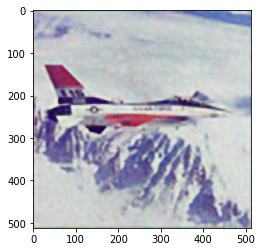

In [26]:
for i in range(30):
    m.fit(net_input, img_noisy_np, verbose=0, epochs=100)
    out = m.predict(net_input)
    psrn_noisy = compare_psnr(img_noisy_np[0], out[0]) 
    psrn_gt = compare_psnr(img_np[0], out[0])
    print("Iter #", i, ", PSRN NOISY: ", psrn_noisy, "; PSRN GT: ", psrn_gt)
    
    out = out.reshape((3, imsize, imsize))
    plt.imshow(out.transpose(1, 2, 0), interpolation='lanczos')
    plt.show()
    
    net_input += np.random.standard_normal(net_input.shape) * reg_noise_std
#     get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0]))

In [ ]:
out = m.predict(net_input)

In [ ]:
out = out.reshape((3, imsize, imsize))

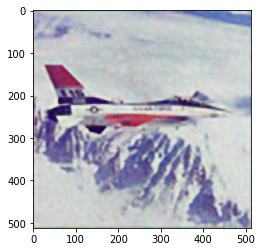

In [29]:
out = np.clip(out, 0, 1)
plt.imshow(out.transpose(1, 2, 0), interpolation='lanczos')
plt.show()

In [21]:
img = img_noisy_np.reshape((3, imsize, imsize))

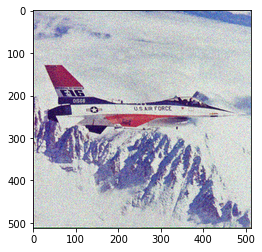

In [22]:
plt.imshow(img.transpose(1, 2, 0), interpolation='lanczos')
plt.show()

In [24]:
img = img_np.reshape((3, imsize, imsize))

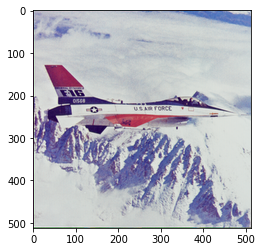

In [25]:
plt.imshow(img.transpose(1, 2, 0), interpolation='lanczos')
plt.show()

In [27]:
img

array([[[0.70980394, 0.7254902 , 0.64705884, ..., 0.5882353 ,
         0.5882353 , 0.5137255 ],
        [0.5529412 , 0.78039217, 0.7647059 , ..., 0.63529414,
         0.5529412 , 0.46666667],
        [0.5529412 , 0.77254903, 0.75686276, ..., 0.68235296,
         0.5647059 , 0.45490196],
        ...,
        [0.627451  , 0.8235294 , 0.827451  , ..., 0.70980394,
         0.6784314 , 0.61960787],
        [0.6392157 , 0.8235294 , 0.8235294 , ..., 0.65882355,
         0.72156864, 0.654902  ],
        [0.13725491, 0.12941177, 0.13333334, ..., 0.38431373,
         0.4       , 0.41960785]],

       [[0.        , 0.80784315, 0.8117647 , ..., 0.6509804 ,
         0.6431373 , 0.5764706 ],
        [0.        , 0.75686276, 0.7411765 , ..., 0.7137255 ,
         0.60784316, 0.54509807],
        [0.        , 0.76862746, 0.75686276, ..., 0.7647059 ,
         0.62352943, 0.5647059 ],
        ...,
        [0.        , 0.84313726, 0.8392157 , ..., 0.7254902 ,
         0.6862745 , 0.5647059 ],
        [0. 